# 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных о ценах домов в Бостоне.
https://github.com/selva86/datasets/blob/master/BostonHousing.csv

Анализ подобного набора данных позволить выявить прежде всего факторы, которые больше всего влияют на цену собственности, а также позволяют отметить некоторые закономерности между определенными характеристиками собственности.

Датасет состоит из одного файла BostonHousing.csv .

Файл содержит следующие колонки:

CRIM - уровень преступности на душу населения<br>
ZN - доля жилых земель, предназначенных для участков площадью более 25 000 кв. футов.<br>
INDUS - доля нерозничных предприятий в акрах на город<br>
CHAS - искусственная переменная близости к р. Чарльз (1 если здание у реки; 0 иначе)<br>
NOX - концентрация оксидов азота (частей на 10 миллионов)<br>
RM - среднее количество комнат на одно жилище<br>
AGE - количество единиц жилья, занимаемых владельцами, построенных до 1940 года<br>
DIS - взвешенные расстояния до пяти Бостонских центров занятости<br>
RAD - индекс доступности радиальных магистралей<br>
TAX - налог на недвижимость полной стоимости за $10 000<br>
PTRATIO - соотношение числа учащихся и учителей<br>
B - доля чернокожих (Bk): 1000(Bk - 0.63)^2<br>
LSTAT - процент более низкого статуса населения<br>
MEDV - средняя стоимость домов, занятых владельцами, в тысячах долларов США<br>

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных
Загрузим файлы датасета с помощью библиотеки Pandas.

In [145]:
data = pd.read_csv('data/BostonHousing.csv', sep=",")

# 2) Основные характеристики датасета

In [146]:
# Первые 5 строк датасета
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [147]:
# Размер датасета - 100 строк, 6 колонок
data.shape

(506, 14)

In [148]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 506


In [149]:
# Список колонок
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [150]:
# Список колонок с типами данных
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [151]:
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

crim - 0
zn - 0
indus - 0
chas - 0
nox - 0
rm - 0
age - 0
dis - 0
rad - 0
tax - 0
ptratio - 0
b - 0
lstat - 0
medv - 0


In [152]:
# Основные статистические характеристки набора данных
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [153]:
# Определим уникальные значения для целевого признака
data['medv'].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

 Целевой признак содержит множество уникальных значений.

# 3) Визуальное исследование датасета


# Диаграмма рассеяния

В данном случае рассмотрим <b>отношение средней стоимости дома и количества комнат в нем.</b>

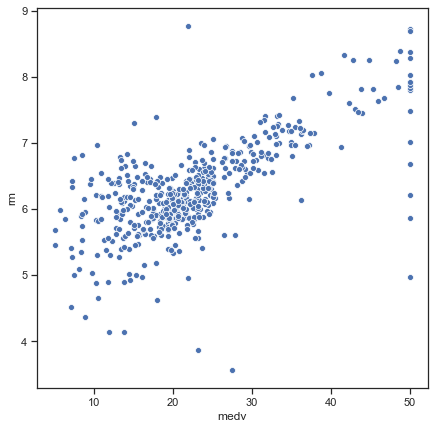

In [154]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.scatterplot(ax=ax, x='medv', y='rm', data=data)

Больше комнат - стоимость, очевидно, больше. Однако большинство зданий имеют до 7 комнат.

А теперь <b>выделим цветом процент населения более низкого статуса.</b>

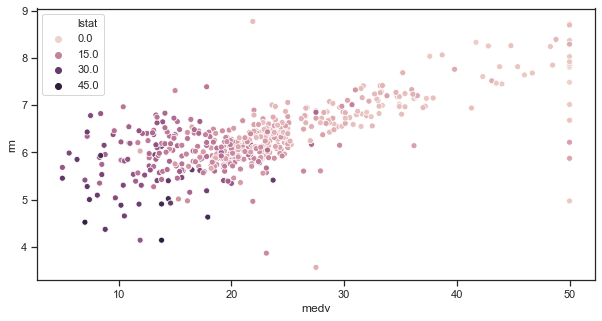

In [155]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='medv', y='rm', hue = 'lstat', data=data)

Виден очевидный факт - население более низкого статуса может позволить себе только дешевые дома.<br>
Однако этот дом необязательно будет иметь маленькое количество комнат.

Также мною была замечена странная <b>связь концентрации оксидов азота и расстояния до центров занятости.</b>

Text(0, 0.5, 'Расстояние до центров занятости')

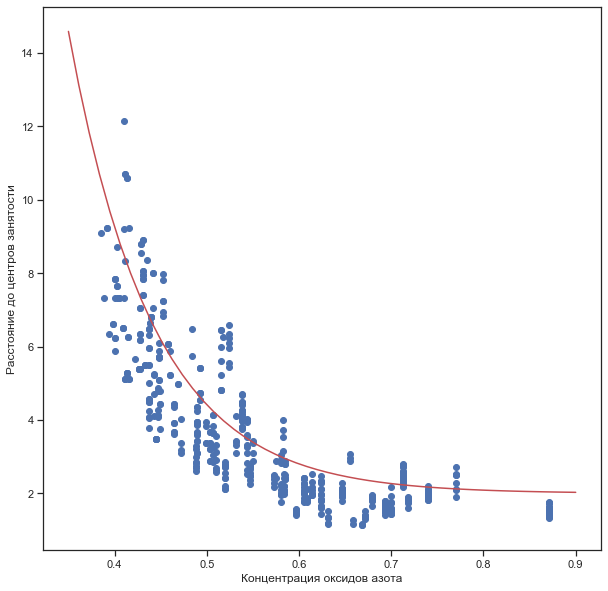

In [156]:
plt.figure(figsize = (10,10))
X_plot = np.linspace(0.35, 0.9, 50)
Y_plot = np.exp(-(X_plot*11-2))*80+2
plt.scatter(data['nox'], data['dis']); plt.plot(X_plot, Y_plot, color='r')
plt.xlabel('Концентрация оксидов азота')
plt.ylabel('Расстояние до центров занятости')

Красным показана приблизительная "экспоненциальная зависимость".

# Гистограмма

Оценим плотность вероятности <b>распределения среднего числа комнат.</b>

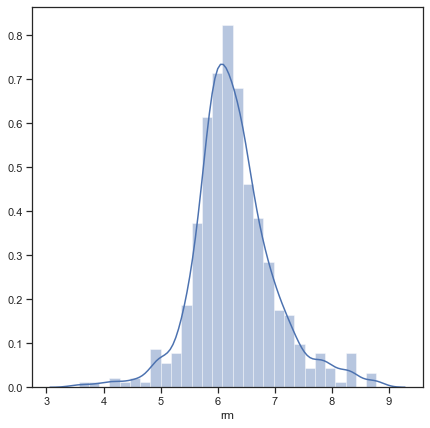

In [157]:
plt.figure(figsize = (7,7))
sns.distplot(data['rm'])

Построим <b>jointplot для отношения концентрации азота и расстояния до центров занятости.</b>

<Figure size 504x504 with 0 Axes>

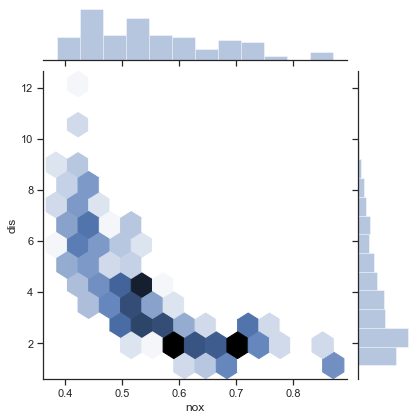

In [158]:
plt.figure(figsize = (7,7))
sns.jointplot(x='nox', y='dis', data=data, kind="hex")

<b>Парная диаграмма, где цветом обозначена близость к реке.</b>

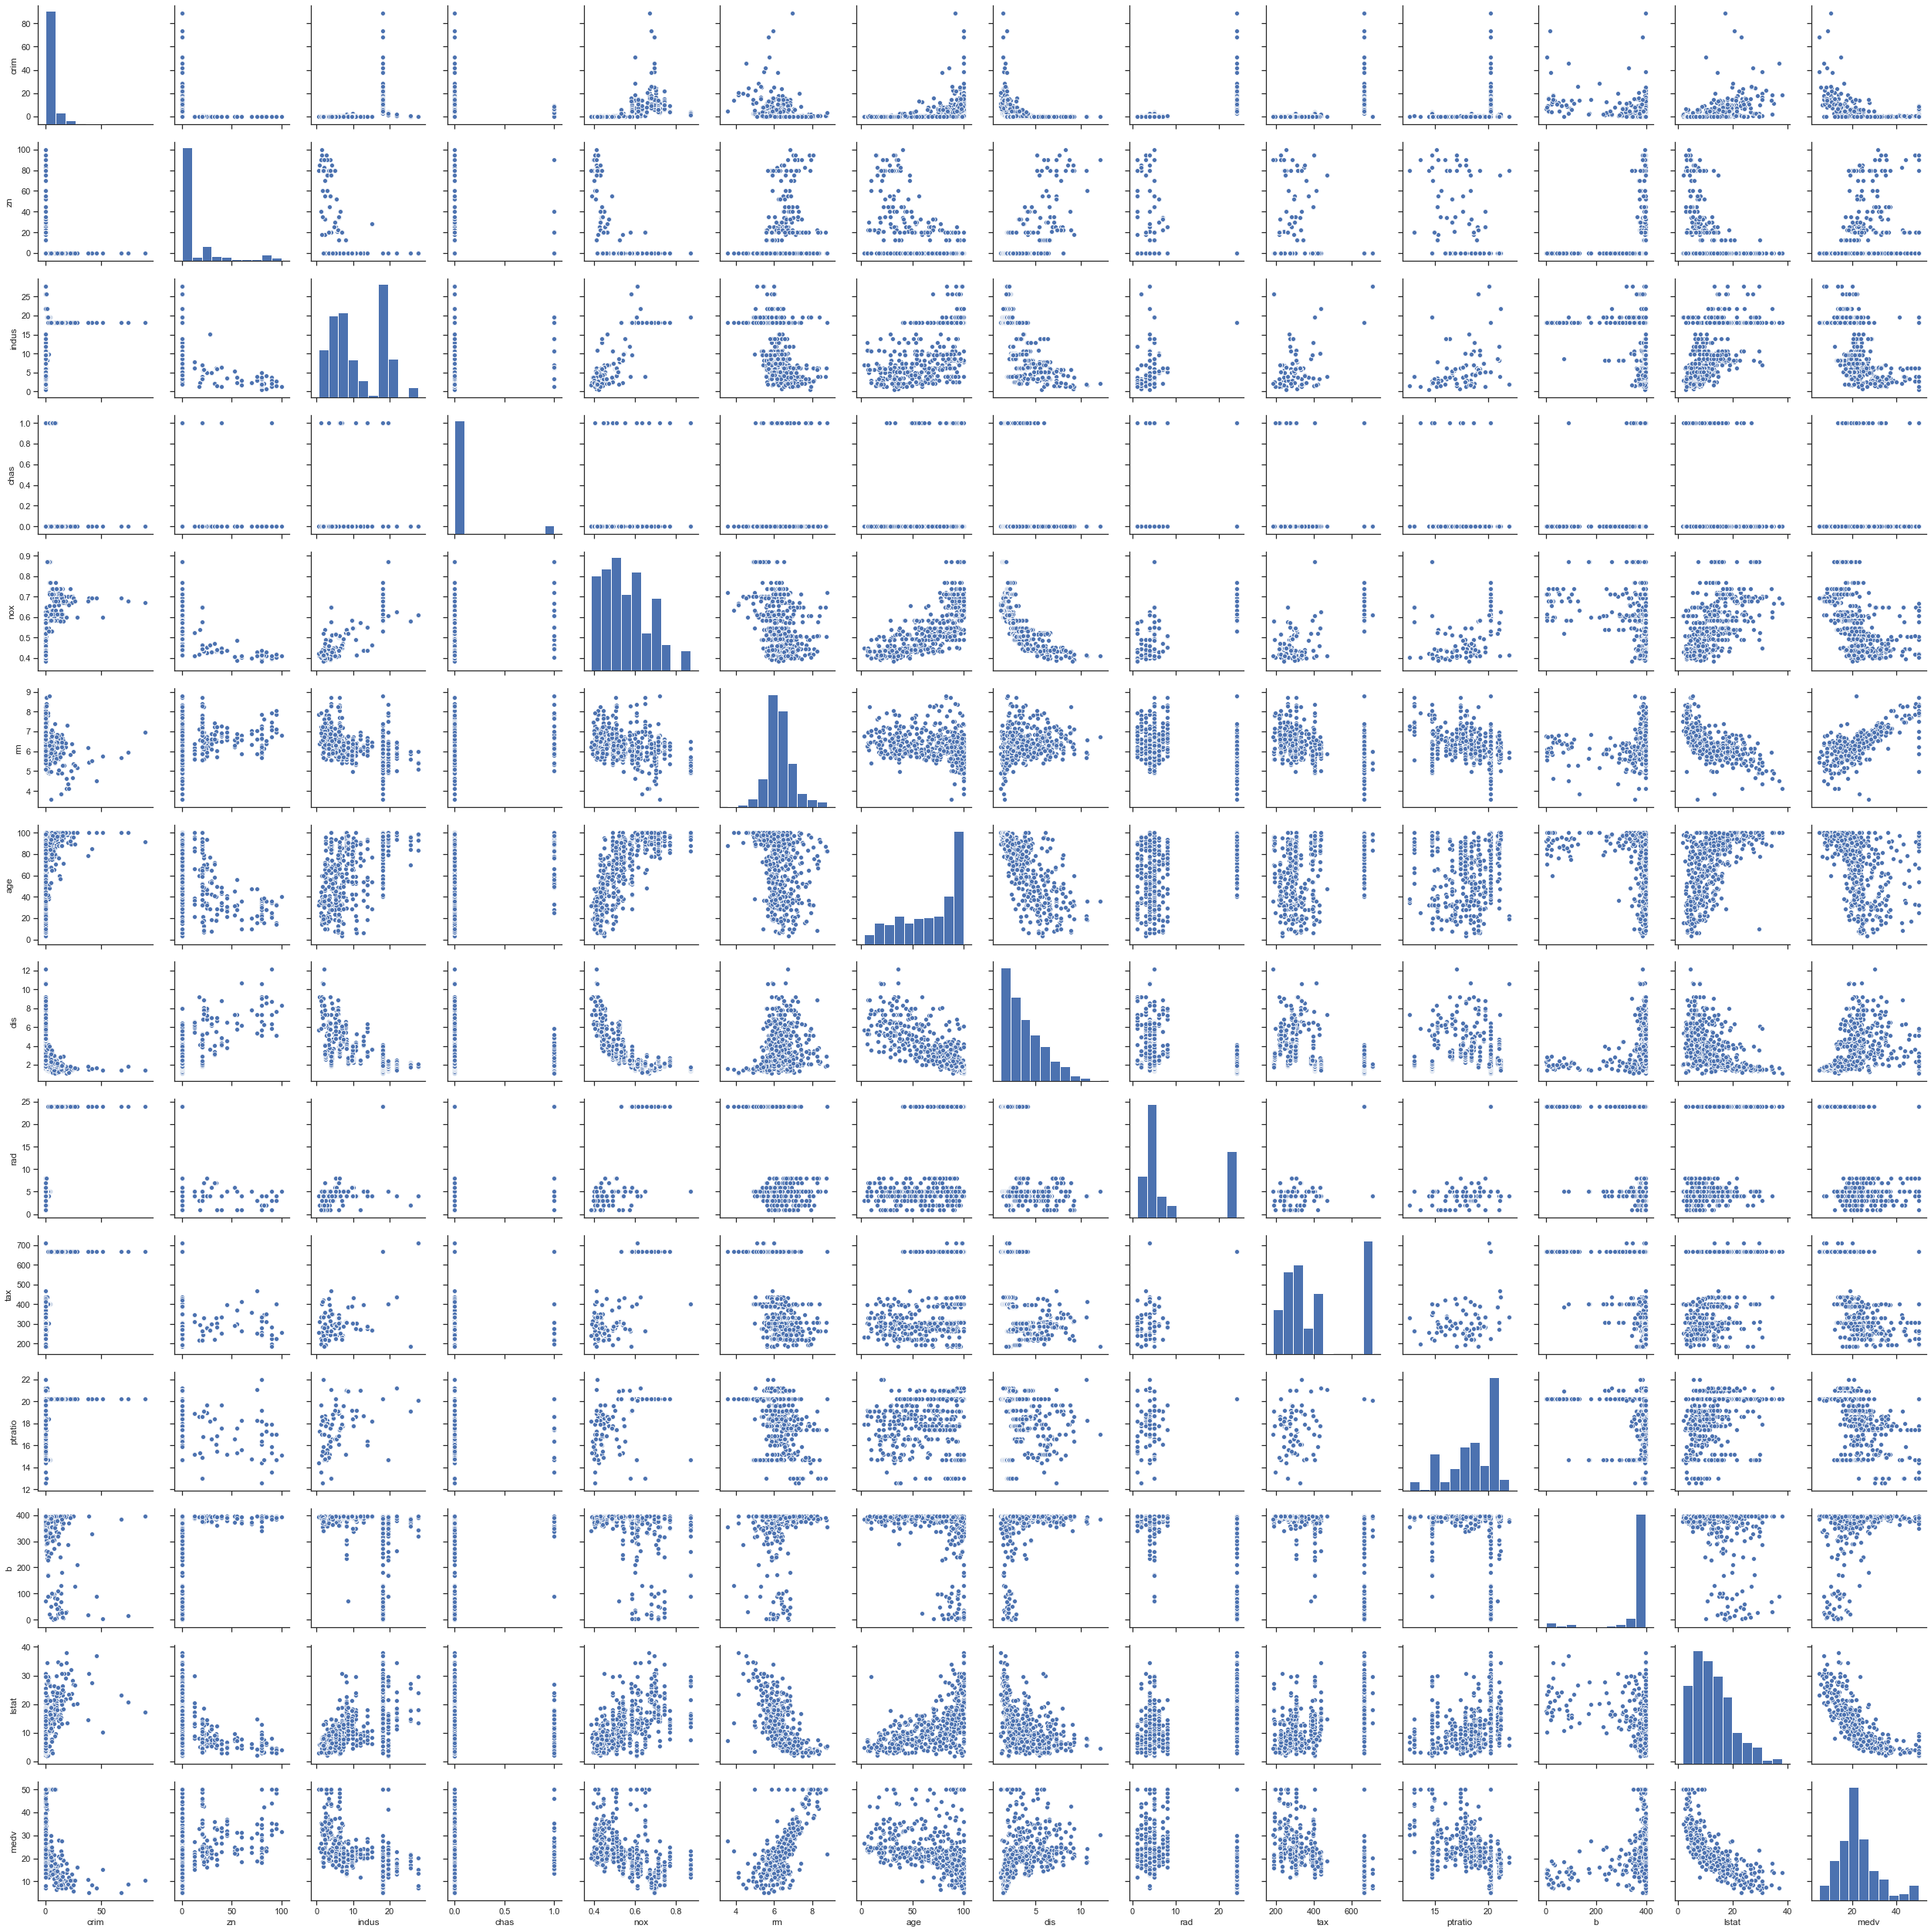

In [159]:
sns.pairplot(data)

<b>Violin plot</b>

Распределение плотности для средней стоимости, сгрупированное по близости к реке.

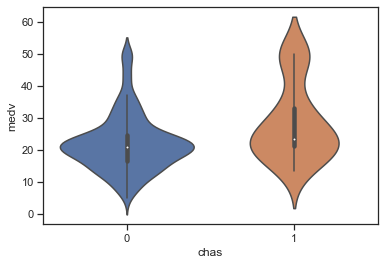

In [160]:
sns.violinplot(x='chas', y='medv', data=data)

# 4)Информация о корреляции признаков

In [161]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Тепловая карта

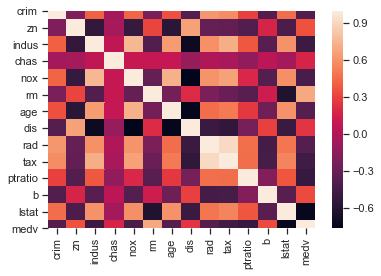

In [162]:
sns.heatmap(data.corr())

# Тепловая карта со значениями

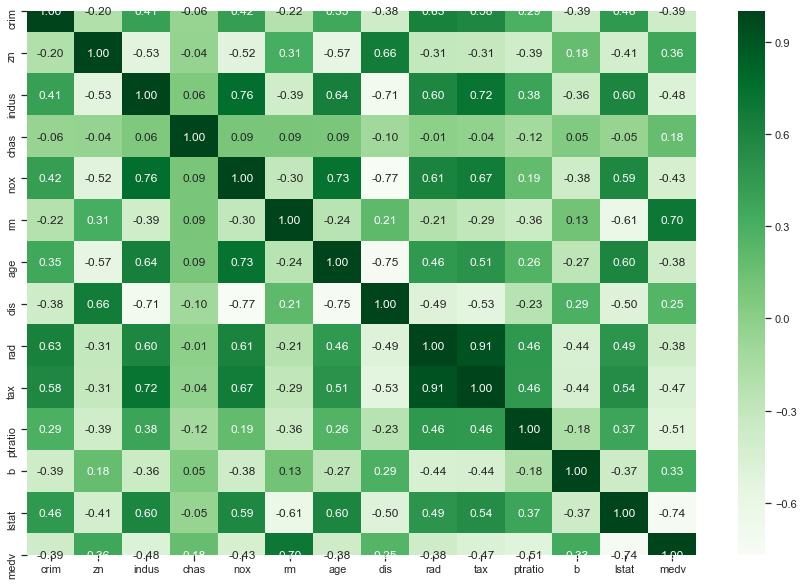

In [163]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap='Greens', annot=True, fmt='.2f')

# Сортировка корреляций для целевого признака

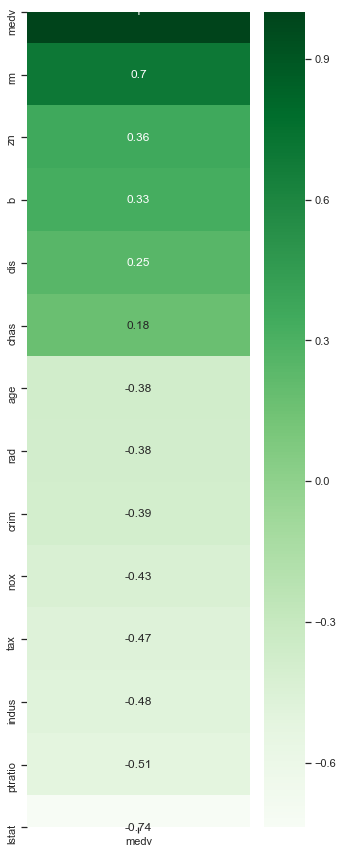

In [167]:
plt.figure(figsize = (5,15))
sns.heatmap(data.corr()[['medv']].sort_values(by=['medv'],ascending=False),
            cmap='Greens',
            annot=True);

# Треугольнгая тепловая карта корреляций с обнулёнными незначительными корреляциями

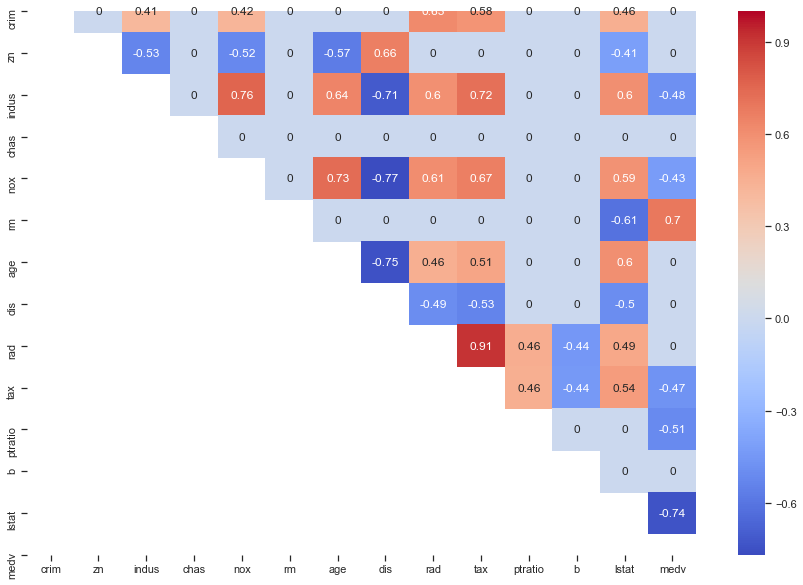

In [165]:
new_corr = data.corr()
new_corr[np.abs(new_corr)<.4] = 0
plt.figure(figsize=(15,10))
mask = np.zeros_like(new_corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(new_corr, mask = mask, cmap = 'coolwarm', annot=True);